# Introdução às Bibliotecas Essenciais

1. Pandas
2. Matplotlib
3. Numpy
4. Seaborn

In [5]:
#Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Pandas

- Pandas serve para manipulação de arquivos como de estrutura de dados (Ex. CSV e Excel)

#### Obs. : Se fosse uma planilha no excel (play_tennis.xlsx):

``` python
df = pd.read_excel('play_tennis.xlsx')
```

In [6]:
df = pd.read_csv('play_tennis.csv')

df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


### Alguns comandos básicos:

- Primeiras 5 linhas do dataframe:

```python
df.head()
```

- Últimas 5 linhas do dataframe:

```python
df.tail()
```

Imprimimos o dataframe no bloco de código acima e percebemos que a coluna de dia ("day") é desnecessária já que temos uma coluna de índice naturalmente. Podemos excluir essa coluna com:

```pyhton
df = df.drop(columns=['day'])
```
-> Estou pegando o df existente e fazendo o _drop_ da coluna _'days'_.

In [7]:
df = df.drop(columns=['day'])

df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Vamos para alguns comandos de informações gerais do dataframe

```python
df.info()
```

- Esse comando irá listar algumas informações úteis do df como itens nulos que posteriormente poderão que ser completados com a moda ou a média, por exemplo.

- Para saber os nulos também pode se usar o comando específico _isnull_

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


```python
df.describe()
```

- Esse comando irá retorna a contagem de valores e também de valores únicos. Pode servir para posteriormente tornar alguma coluna em binário como _'humidity', 'wind' e 'play'._

In [9]:
df.describe()

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


### Diferença entre usar o df.loc e .iloc

#### .loc
- Esse método é baseado apenas nas lables das colunas, porém podemos utilizar com um array booleano também.

Obs. : Quando nenhum item é encontrado é retornado _KeyError_.

Funcionamento:
```python
df.loc[<linhas>, <colunas>]
```

Exemplos:
```python
#Pode chamar apenas uma linha pelo índice
df.loc[[5]]
#Ou também por um array de índices
df.loc[[2,3,4,5]]
```

#### .iloc

- Esse seleciona por números inteiros das linhas, arrays ou por slice.

Funcionanemnto igual ao .loc:
```python
df.iloc[<linhas>, <colunas>]
```
Exemplos:
```python
df.iloc[0] #Primeira linha
df.iloc[-1] #Última linha

#Do primeiro ao quinto dado da última linha
df.iloc[0:5,-1]
```

- Note que usar _0:5_ ≠ [0,1,2,3,4,5], pois o primeiro retornará até o índice 4 (quinto elemento) e o segundo até o índice 5 (sexto elemento).


Fonte:

[Medium - Como usar loc e iloc no pandas?](https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87)

#### Também podemos juntar colunas ou filtra-las

- Exemplo filtrando uma coluna com valores maiores que 10:
```python
df_filtrado = df[df['coluna'] > 10]  # Filtrar com base em uma condição
```

- A seguir iremos juntar as colunas _humidity_ e _wind_ em uma nova coluna que será criada em df.

In [10]:
df['humi_wind'] = df['humidity'] + "_" + df['wind']

df['humi_wind']

,humi_wind
0,High_Weak
1,High_Strong
2,High_Weak
3,High_Weak
4,Normal_Weak
5,Normal_Strong
6,Normal_Strong
7,High_Weak
8,Normal_Weak
9,Normal_Weak


### Para fazer drop

```python
df.drop('coluna', axis=1, inplace=True)
```

Vamos entender esse comando:

1. _inplace=True_: Ele define que a alteração será feito no datafreme original, pode ser definido como False também. **Se for feito, a alteração não pode ser desfeita!**

2. _axis=1_: Define que a alteração será feito no eixo das colunas (se definido como "0" será feito no eixo das linha).

### Outro tipo é o _dropna_

- Esse remove linhas com valores nulos. É um jeito de tratar valores nulos, porém, normalmente, não é o mais indicado.

```python
df.dropna(inplace=True)
```
- Outro tratamento de valores nulos será o _fillna_

```python
df['coluna'].fillna(mean, inplace=True)
```
Esse completa os valores nulos da coluna com o valor da média ('mean'). Lembre-se que a média precisa ser calculada antes e atribuída à variável _mean_.

### Calculando a média:

```python
mean = df['coluna'].mean() #Retorna em mean o valor da média da coluna
```

### Criando um df_agrupado:

```python
df_grouped = df.groupby('coluna').mean()  # Agrupar e calcular a média
```

Esse irá agrupar os valores únicos da coluna e calcular a média dos valores dos demais dados deles.

## 2. Numpy

In [11]:
arr = np.array([1, 2, 3, 4])  # Criar um array
arr_zeros = np.zeros((2, 3))  # Criar uma matriz 2x3 de zeros
arr_ones = np.ones((3, 3))  # Criar uma matriz 3x3 de uns

print(arr)
print("------------")
print(arr_zeros)
print("------------")
print(arr_ones)

[1 2 3 4]
------------
[[0. 0. 0.]
 [0. 0. 0.]]
------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [12]:
arr_sum = arr + 10  # Somar um valor a todos os elementos
arr_mean = np.mean(arr)  # Calcular a média
arr_std = np.std(arr)  # Calcular o desvio padrão

arr_max = np.max(arr)  # Encontrar o valor máximo
arr_min = np.min(arr)  # Encontrar o valor mínimo

print(arr_sum)
print("------------")
print(arr_mean)
print("------------")
print(arr_std)
print("------------")
print(arr_max)
print("------------")
print(arr_min)

[11 12 13 14]
------------
2.5
------------
1.118033988749895
------------
4
------------
1


In [13]:
#Indexação e Slicing

print(arr[0])  # Primeiro elemento
print("------------")
print(arr[-1])  # Último elemento
print("------------")
print(arr[:2])  # Primeiros dois elementos

1
------------
4
------------
[1 2]


## 3. Matplotlib: Criando gráficos



1.   Gráfico de Linhas

O gráfico de linhas é um dos mais simples de se fazer com o _matplotlib_, segue o exemplo:

```python
plt.plot(df['coluna_x'], df['coluna_y'])
plt.title('Titulo do Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()
```

2. Gráfico de Barras

O gráfico de barras é um outro exemplo de gráfico possível para fazer com essa biblioteca.

```python
plt.bar(df['coluna_categorias'], df['coluna_valores'])
plt.title('Titulo do Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()
```

3. Gráfico de Pizza

O gráfico de pizza é uma outra opção quando o intúito é mostrar a porcentagem dos dados.

```python
plt.pie(df['coluna_valores'],labels=df['coluna_categorias'], autopct='%1.1f%%')
plt.title('Titulo do Gráfico')
plt.show()
```

4. Histograma

O histograma é utilizado para mostrar a distribuição de uma variável contínua em um espaço de tempo.

```python
plt.hist(df['coluna'])
plt.title('Titulo do Gráfico')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()
```

5. Gráfico de dispersão (Scatter Plot)

O scatter plot é usado para mostrar a relação entre duas variáveis.

```python
plt.scatter(df['coluna_x'], df['coluna_y'])
plt.title('Título do Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()
```

6. Boxplot

O boxplot é usado para mostrar a distribuição de uma variável com base em seus quartis.

```python
plt.boxplot(df['coluna'])
plt.title('Título do Gráfico')
plt.ylabel('Valores')
plt.show()
```

7. Gráfico de Barras Empilhadas

O gráfico de barras empilhadas é usado para mostrar a composição de cada categoria ao longo do tempo.

```python
plt.bar(df['coluna_x'], df['coluna_y1'], label='Série 1')
plt.bar(df['coluna_x'], df['coluna_y2'], bottom=df['coluna_y1'], label='Série 2')
plt.title('Título do Gráfico')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.legend()
plt.show()
```

8. Gráfico de Áreas

O gráfico de áreas é usado para mostrar a contribuição de diferentes categorias ao longo do tempo.

```python
plt.fill_between(df['coluna_x'], df['coluna_y1'], label='Série 1')
plt.fill_between(df['coluna_x'], df['coluna_y2'], label='Série 2')
plt.title('Título do Gráfico')
plt.xlabel('Eixo X')
plt.ylabel('Valores')
plt.legend()
plt.show()
```

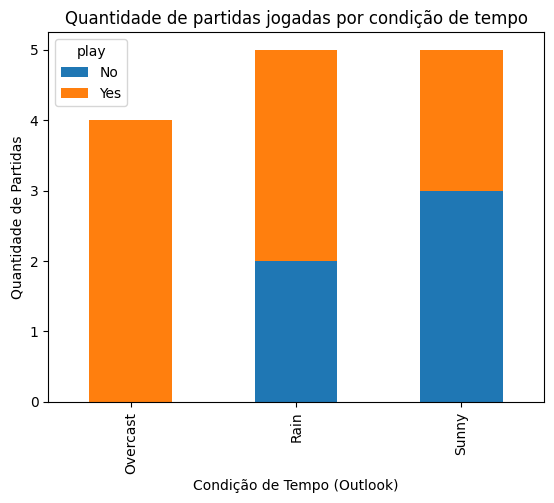

In [22]:
df_grouped = df.groupby(['outlook', 'play']).size().unstack()

df_grouped.plot(kind='bar', stacked=True)
plt.title('Quantidade de partidas jogadas por condição de tempo')
plt.xlabel('Condição de Tempo (Outlook)')
plt.ylabel('Quantidade de Partidas')
plt.show()


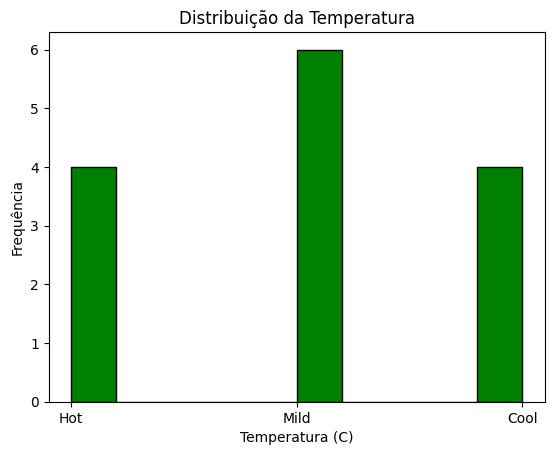

play       No  Yes
outlook           
Overcast  NaN  4.0
Rain      2.0  3.0
Sunny     3.0  2.0


In [30]:
plt.hist('temp', data=df, color=['green'], edgecolor='black')
plt.xlabel('Temperatura (C)')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura')
plt.show()

print(df_grouped)

In [38]:
#Agrupando a quantidade de partidadas que ocorreram a e que não ocorreram
grouped_play = df['play'].value_counts()
grouped_play.describe()

,count
count,2.000000
mean,7.000000
std,2.828427
min,5.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,9.000000


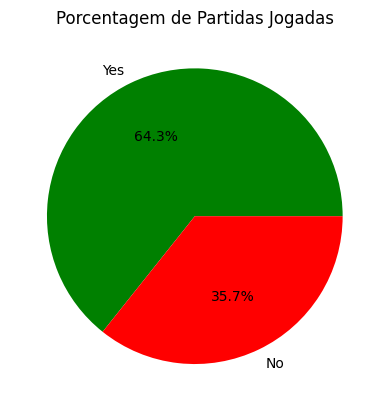

In [39]:
# Criar o gráfico de pizza
plt.pie(grouped_play, labels=grouped_play.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Porcentagem de Partidas Jogadas')
plt.show()